<a href="https://colab.research.google.com/github/CJL810/Behavioural_Cloning_Self_Driving_Car/blob/master/Behavioural_Cloning_SDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!git clone https://github.com/CJL810/BH_Dataset.git

fatal: destination path 'BH_Dataset' already exists and is not an empty directory.


In [30]:
!ls BH_Dataset

driving_log.csv  IMG  README.md


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import random
import os
import ntpath
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle

In [32]:
datadir = 'BH_Dataset'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,/Users/cam/Documents/Complete SDC Course/Data/IMG/center_2019_02_09_22_28_54_631.jpg,/Users/cam/Documents/Complete SDC Course/Data/IMG/left_2019_02_09_22_28_54_631.jpg,/Users/cam/Documents/Complete SDC Course/Data/IMG/right_2019_02_09_22_28_54_631.jpg,0.0,0.0,0.0,0.000082
1,/Users/cam/Documents/Complete SDC Course/Data/IMG/center_2019_02_09_22_28_54_737.jpg,/Users/cam/Documents/Complete SDC Course/Data/IMG/left_2019_02_09_22_28_54_737.jpg,/Users/cam/Documents/Complete SDC Course/Data/IMG/right_2019_02_09_22_28_54_737.jpg,0.0,0.0,0.0,0.000081
2,/Users/cam/Documents/Complete SDC Course/Data/IMG/center_2019_02_09_22_28_54_845.jpg,/Users/cam/Documents/Complete SDC Course/Data/IMG/left_2019_02_09_22_28_54_845.jpg,/Users/cam/Documents/Complete SDC Course/Data/IMG/right_2019_02_09_22_28_54_845.jpg,0.0,0.0,0.0,0.000082
3,/Users/cam/Documents/Complete SDC Course/Data/IMG/center_2019_02_09_22_28_54_951.jpg,/Users/cam/Documents/Complete SDC Course/Data/IMG/left_2019_02_09_22_28_54_951.jpg,/Users/cam/Documents/Complete SDC Course/Data/IMG/right_2019_02_09_22_28_54_951.jpg,0.0,0.0,0.0,0.000082
4,/Users/cam/Documents/Complete SDC Course/Data/IMG/center_2019_02_09_22_28_55_061.jpg,/Users/cam/Documents/Complete SDC Course/Data/IMG/left_2019_02_09_22_28_55_061.jpg,/Users/cam/Documents/Complete SDC Course/Data/IMG/right_2019_02_09_22_28_55_061.jpg,0.0,0.0,0.0,0.000082


In [33]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2019_02_09_22_28_54_631.jpg,left_2019_02_09_22_28_54_631.jpg,right_2019_02_09_22_28_54_631.jpg,0.0,0.0,0.0,0.000082
1,center_2019_02_09_22_28_54_737.jpg,left_2019_02_09_22_28_54_737.jpg,right_2019_02_09_22_28_54_737.jpg,0.0,0.0,0.0,0.000081
2,center_2019_02_09_22_28_54_845.jpg,left_2019_02_09_22_28_54_845.jpg,right_2019_02_09_22_28_54_845.jpg,0.0,0.0,0.0,0.000082
3,center_2019_02_09_22_28_54_951.jpg,left_2019_02_09_22_28_54_951.jpg,right_2019_02_09_22_28_54_951.jpg,0.0,0.0,0.0,0.000082
4,center_2019_02_09_22_28_55_061.jpg,left_2019_02_09_22_28_55_061.jpg,right_2019_02_09_22_28_55_061.jpg,0.0,0.0,0.0,0.000082


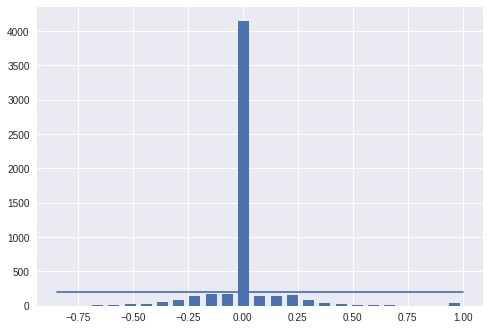

In [34]:
num_bins = 25
samples_per_bin = 200
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width = 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

total data:  5517
removed:  3947
remaining:  1570


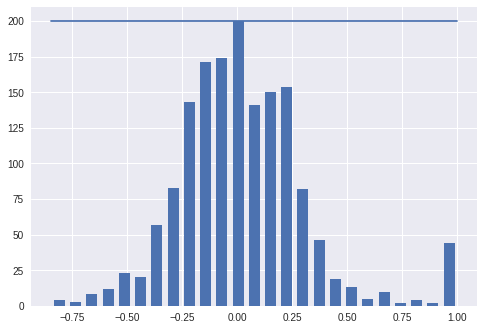

In [35]:
print('total data: ', len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed: ', len(remove_list))
data.drop(data.index[remove_list], inplace = True)
print('remaining: ', len(data))

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width = 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))